## Python statistics essential training - 05_06_bayesian

Standard imports

In [12]:
import math

In [13]:
import numpy as np
import pandas as pd

In [14]:
import matplotlib
import matplotlib.pyplot as pp

In [15]:
%matplotlib inline

In [16]:
import pymc3 as pm # Bayesian inference

In [17]:
# Traditional approach: Estiamting of population parametes from the data.

In [18]:
# Bayesian approach: We characterise the population parameters with propability distributions Which represent our knowledge and uncertainty.

# Bayesian procedure:
1. We start with prior propabilities.
2. We make observation and use the observed data to update prior into posterior probabilites. 

### Example:
#### Suppose a cat is hide between 2 doors A and B.
#### __Step1__
    prior propability that cat is behind door A is P(A) = 1/2
    prior propability that cat is behind door B is P(B) = 1/2
#### __Step2__
    Make observations.
    We observed that a cats tail from door A
#### __Step3__
    I am able to update the propability of finding a cat (prior)
    new propability that cat is behind door A is P(A) = 1
    new propability that cat is behind door B is P(B) = 0

### For general distrution the update rule is called Bayes therom.

$$P (population parameter|data) = \frac {P(data|population parameter) P(population parameter) }{ \int P(data | population parameter) P(population parameter) d(population parameter)}$$

$$ P \left ( \theta | y \right ) = \frac{ P \left ( y | \theta \right ) P \left (\theta \right )}{\Sigma P \left ( y | \theta \right ) P \left ( \theta \right )} $$

#### Question:
    I have a single coin I am very suspecious about the coin chances propability.
    I suspect the coin return 40% to 80% of times head instead of 50%
    So, I tried 100 toss and found 61 times heads.

In [23]:
n = 100 # no of trails
k = 61 # Found heads (obsercation)
with pm.Model() as coin_context:
    p = pm.Uniform('p', 0.40, 0.80) # prior propabilities for coin head is a unifrom distribution function. # Knowledge [prior]
    pm.Binomial('y', n=n,p=p, observed=k) # observation [posterior]
    # Sample the posterior
    # We ask pymc3 to generate a large set of parameters which will be approximately according to posterior. the set of parameters is called as trace.
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42000/42000 [00:13<00:00, 3113.69draws/s]


In [24]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p,0.608385,0.047676,0.000363,0.513465,0.6994,15146.399834,1.000116


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001877E72EC50>,
      dtype=object)

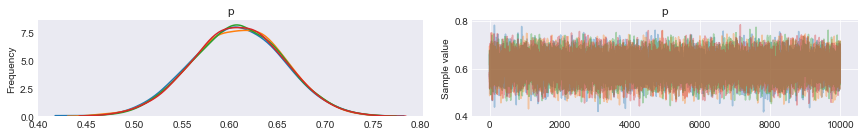

In [25]:
pm.traceplot(trace)

In [26]:
# Baysian statistical modelling

In [27]:
gdata = pd.read_csv('gapminder.csv').query('year == 1985')

In [28]:
gdata.sort_values('age5_surviving', inplace=True)

Text(0.5, 1.0, 'data')

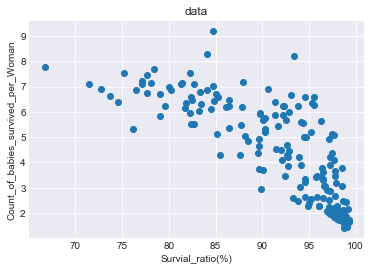

In [33]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])
pp.xlabel('Survial_ratio(%)')
pp.ylabel('Count_of_babies_survived_per_Woman')
pp.title('data')

In [34]:
# model

In [42]:
# Randomly distributed around the error. 
# Error is very important in bayesian modelling.

In [43]:
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept', 5, 15) # prior
    slope = pm.Uniform('slope', -1, 1) # prior
    
    babies = pm.Normal('babies', mu = intercept + slope* (gdata['age5_surviving'] - 65), sd=1,  #refering as 65% 
                        observed=gdata['babies_per_woman']) # observation 
    trace = pm.sample(10000) # sample from distribution.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept]
Sampling 4 chains: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42000/42000 [00:23<00:00, 1768.13draws/s]
The acceptance probability does not match the target. It is 0.885453896004571, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8892476517333612, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [44]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,10.195493,0.283215,0.002637,9.633815,10.742757,8420.773924,1.000021
slope,-0.219263,0.010246,0.000095,-0.239371,-0.199446,8432.937792,1.000016


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001870061F898>,
      dtype=object)

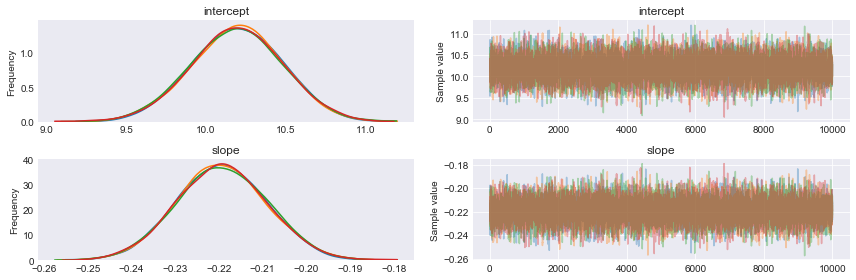

In [45]:
pm.traceplot(trace)

In [46]:
# [observations] posteriors are centerd about 10 for intercepts and -0.22 for slope 
# We have a good control over uncertanity.

In [53]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving']-65)

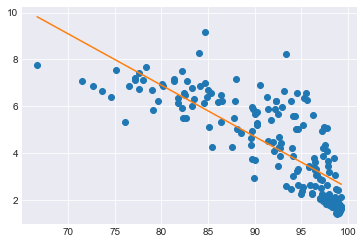

In [54]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'], babies, 'C1')

In [55]:
# Every point in posterior belongs  to a slightly different model.

In [56]:
# Ploting for all the system of models.

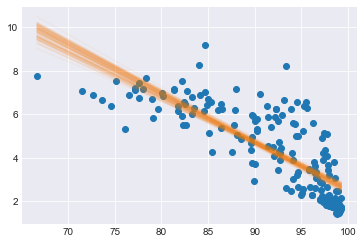

In [60]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])

for i, intercept, slope in zip(range(100), trace['intercept'][::50], trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving']-65)
    pp.plot(gdata['age5_surviving'], babies, color='C1', alpha=0.05)